<a href="https://colab.research.google.com/github/endar1y12/ML/blob/main/ML_meet_12_part2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

POHON KEPUTUSAN


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
from sklearn import tree

file ='loan2.csv'
df=pd.read_csv(file)

df.head()
df.shape
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5584 entries, 0 to 5583
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Status_nikah         5584 non-null   object
 1   Penghasilan_Tahunan  5584 non-null   int64 
 2   Pemilik_rumah        5584 non-null   object
 3   Ada_pinjaman         5584 non-null   object
 4   Status_pinjaman      5584 non-null   object
dtypes: int64(1), object(4)
memory usage: 218.2+ KB


In [ ]:
d ={'Ya':1,"Tidak":0}
df['Pemilik_rumah']=df['Pemilik_rumah'].map(d)
df['Ada_pinjaman']=df['Ada_pinjaman'].map(d)
d1 ={'Jomblo':0,'Nikah':1,'Cerai':2}
df['Status_nikah']=df['Status_nikah'].map(d1)
df.head()
df.columns


Index(['Status_nikah', 'Penghasilan_Tahunan', 'Pemilik_rumah', 'Ada_pinjaman',
       'Status_pinjaman'],
      dtype='object')

In [ ]:
X = df[['Pemilik_rumah','Status_nikah','Penghasilan_Tahunan']]
y = df['Ada_pinjaman']
fitur = list(df.columns[:3])
print(fitur)

['Status_nikah', 'Penghasilan_Tahunan', 'Pemilik_rumah']


In [ ]:
model = tree.DecisionTreeClassifier(criterion='entropy',splitter='random')
model = model.fit(X,y)

In [ ]:
# !pip install graphviz
# import os


# os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
dot: graph is too large for cairo-renderer bitmaps. Scaling by 0.122812 to fit



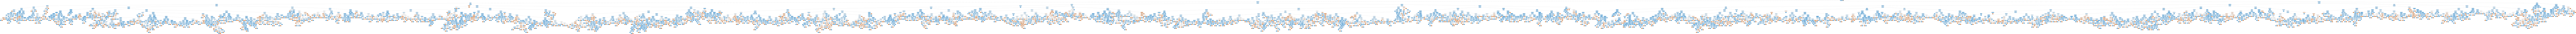

In [ ]:
!pip install pydotplus
from IPython.display import Image
# from sklearn.externals.six import StringIO
from six import StringIO
import pydotplus

#Text I/O implementation using an in-memory buffer
dot_data=StringIO()

# tree.export_graphviz
tree.export_graphviz(model,out_file =dot_data,feature_names=fitur,filled=True,rounded=True)
#load graph as defined by data in DOT format
graph=pydotplus.graph_from_dot_data(dot_data.getvalue())

#create a png
Image(graph.create_png())

In [ ]:



from sklearn.tree import export_text

r = export_text(model,feature_names=fitur)

print(r)
model.predict([[0,0,150]])


|--- Pemilik_rumah <= 61819.00
|   |--- Penghasilan_Tahunan <= 0.94
|   |   |--- Status_nikah <= 0.26
|   |   |   |--- Pemilik_rumah <= 10649.35
|   |   |   |   |--- Pemilik_rumah <= 9805.57
|   |   |   |   |   |--- Pemilik_rumah <= 9266.26
|   |   |   |   |   |   |--- Pemilik_rumah <= 2726.99
|   |   |   |   |   |   |   |--- Pemilik_rumah <= 1284.12
|   |   |   |   |   |   |   |   |--- class: 0
|   |   |   |   |   |   |   |--- Pemilik_rumah >  1284.12
|   |   |   |   |   |   |   |   |--- Pemilik_rumah <= 2473.62
|   |   |   |   |   |   |   |   |   |--- Pemilik_rumah <= 1888.66
|   |   |   |   |   |   |   |   |   |   |--- Pemilik_rumah <= 1471.04
|   |   |   |   |   |   |   |   |   |   |   |--- class: 1
|   |   |   |   |   |   |   |   |   |   |--- Pemilik_rumah >  1471.04
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- Pemilik_rumah >  1888.66
|   |   |   |   |   |   |   |   |   |   |--- Pemilik_rumah <= 2316.39
|   

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])